# Understanding GroupBy Operations

In [1]:
# Installed packages
import pandas as pd

# Our package
#from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file

In [2]:
titanic = pd.read_csv("Data1/Course_Material_Part2/Video_Lecture_NBs/titanic.csv")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
titanic_sex_age = titanic.iloc[:10, [2,3]]

In [7]:
titanic_sex_age

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [8]:
groupby_obj = titanic_sex_age.groupby(by = "sex")

In [9]:
groupby_obj

In [10]:
type(groupby_obj)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
groupby_obj.groups

{'female': Int64Index([1, 2, 3, 8, 9], dtype='int64'),
 'male': Int64Index([0, 4, 5, 6, 7], dtype='int64')}

In [12]:
list(groupby_obj)

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [13]:
list(groupby_obj.groups)

['female', 'male']

In [14]:
len(groupby_obj)

2

In [15]:
L = list(groupby_obj)

In [16]:
type(L)

list

In [17]:
L[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [18]:
type(L[0])

tuple

In [19]:
L[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [20]:
type(L[0][1])

pandas.core.frame.DataFrame

In [21]:
L[1]

('male',
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0)

In [22]:
type(L[1])

tuple

In [23]:
L[1][0]

'male'

In [24]:
type(L[1][1])

pandas.core.frame.DataFrame

In [25]:
L[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


# Slicing with loc operator

In [26]:
titanic_sex_age_F = titanic_sex_age.loc[titanic_sex_age.sex == 'female']

In [27]:
titanic_sex_age_F

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [28]:
titanic_sex_age_M = titanic_sex_age.loc[titanic_sex_age.sex == 'male']

In [29]:
titanic_sex_age_M

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [30]:
titanic_sex_age_F.equals(L[0][1])

True

In [31]:
titanic_sex_age_M.equals(L[1][1])

True

In [32]:
[element[1] for element in groupby_obj] #Groupby object splits the DataFrame into two by key "sex"

[      sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0,
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0]

# Splitting with more than one key

In [33]:
summer = pd.read_csv("Data1/Course_Material_Part2/Video_Lecture_NBs/summer.csv")

In [34]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [35]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [36]:
summer.Country.nunique() #This says we have 147 groups

147

In [37]:
split1 = summer.groupby("Country")

In [38]:
L1 = list(split1)

In [39]:
L1

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 ('ALG',
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  19874  1992    Barcelona  Athletics  Athletics    BOULMERKA, Hassiba     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine  

In [40]:
len(L1)

147

In [41]:
L1[100][1] #Splitting by Country at index 100

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [42]:
L1[100][0] #Splitting by Country at index 100

'PHI'

In [43]:
split2 = summer.groupby(by = ["Country", "Gender"])

In [44]:
L2 = list(split2)

In [45]:
L2

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 (('ALG', 'Men'),
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine     ALG   
  21610  1996      Atlanta  Athletics  Athlet

In [46]:
len(L2)

236

In [47]:
[(country, gender) for country, gender in L2]

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 (('ALG', 'Men'),
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine     ALG   
  21610  1996      Atlanta  Athletics  Athlet

In [48]:
L2[104]

(('IRL', 'Women'),
        Year     City      Sport Discipline                Athlete Country  \
 21356  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21369  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21375  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21381  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 23627  2000   Sydney  Athletics  Athletics      O'SULLIVAN, Sonia     IRL   
 29896  2012   London     Boxing     Boxing          TAYLOR, Katie     IRL   
 
       Gender                   Event   Medal  
 21356  Women          200M Butterfly  Bronze  
 21369  Women  200M Individual Medley    Gold  
 21375  Women          400M Freestyle    Gold  
 21381  Women  400M Individual Medley    Gold  
 23627  Women                   5000M  Silver  
 29896  Women                   60 KG    Gold  )

In [49]:
L2[104][0] #First element is tuple consisting of Country and Gender

('IRL', 'Women')

In [50]:
L2[104][0][0]

'IRL'

In [51]:
L2[104][0][1]

'Women'

In [52]:
type(L2[104][0])

tuple

In [53]:
L2[104][1] #Second Element is a Pandas DataFrame

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21356,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Butterfly,Bronze
21369,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Individual Medley,Gold
21375,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Freestyle,Gold
21381,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Individual Medley,Gold
23627,2000,Sydney,Athletics,Athletics,"O'SULLIVAN, Sonia",IRL,Women,5000M,Silver
29896,2012,London,Boxing,Boxing,"TAYLOR, Katie",IRL,Women,60 KG,Gold


In [54]:
type(L2[104][1])

pandas.core.frame.DataFrame

# Split-Apply-Combined Explained

In [55]:
titanic_sex_age

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [56]:
list(titanic_sex_age.groupby("sex"))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [57]:
list(titanic_sex_age.groupby("sex"))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [58]:
titanic_sex_age.groupby("sex").mean()

,age
sex,
female,28.00
male,28.25


In [59]:
titanic_sex_age.groupby("sex").max()

,age
sex,
female,38.0
male,54.0


In [60]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [61]:
titanic.groupby("sex")[["fare", "age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [62]:
titanic.groupby("sex")[["fare", "age"]]

In [63]:
L3 = list(titanic.groupby("sex")[["fare", "age"]])

In [64]:
L3

[('female',
       survived  pclass     sex   age  sibsp  parch     fare embarked deck
  1           1       1  female  38.0      1      0  71.2833        C    C
  2           1       3  female  26.0      0      0   7.9250        S  NaN
  3           1       1  female  35.0      1      0  53.1000        S    C
  8           1       3  female  27.0      0      2  11.1333        S  NaN
  9           1       2  female  14.0      1      0  30.0708        C  NaN
  ..        ...     ...     ...   ...    ...    ...      ...      ...  ...
  880         1       2  female  25.0      0      1  26.0000        S  NaN
  882         0       3  female  22.0      0      0  10.5167        S  NaN
  885         0       3  female  39.0      0      5  29.1250        Q  NaN
  887         1       1  female  19.0      0      0  30.0000        S    B
  888         0       3  female   NaN      1      2  23.4500        S  NaN
  
  [314 rows x 9 columns]),
 ('male',
       survived  pclass   sex   age  sibsp  parc

In [65]:
type(L3)

list

In [66]:
L3[0]

('female',
      survived  pclass     sex   age  sibsp  parch     fare embarked deck
 1           1       1  female  38.0      1      0  71.2833        C    C
 2           1       3  female  26.0      0      0   7.9250        S  NaN
 3           1       1  female  35.0      1      0  53.1000        S    C
 8           1       3  female  27.0      0      2  11.1333        S  NaN
 9           1       2  female  14.0      1      0  30.0708        C  NaN
 ..        ...     ...     ...   ...    ...    ...      ...      ...  ...
 880         1       2  female  25.0      0      1  26.0000        S  NaN
 882         0       3  female  22.0      0      0  10.5167        S  NaN
 885         0       3  female  39.0      0      5  29.1250        Q  NaN
 887         1       1  female  19.0      0      0  30.0000        S    B
 888         0       3  female   NaN      1      2  23.4500        S  NaN
 
 [314 rows x 9 columns])

In [67]:
type(L3[0])

tuple

In [68]:
L3[1]

('male',
      survived  pclass   sex   age  sibsp  parch     fare embarked deck
 0           0       3  male  22.0      1      0   7.2500        S  NaN
 4           0       3  male  35.0      0      0   8.0500        S  NaN
 5           0       3  male   NaN      0      0   8.4583        Q  NaN
 6           0       1  male  54.0      0      0  51.8625        S    E
 7           0       3  male   2.0      3      1  21.0750        S  NaN
 ..        ...     ...   ...   ...    ...    ...      ...      ...  ...
 883         0       2  male  28.0      0      0  10.5000        S  NaN
 884         0       3  male  25.0      0      0   7.0500        S  NaN
 886         0       2  male  27.0      0      0  13.0000        S  NaN
 889         1       1  male  26.0      0      0  30.0000        C    C
 890         0       3  male  32.0      0      0   7.7500        Q  NaN
 
 [577 rows x 9 columns])

In [69]:
type(L3[1])

tuple

In [70]:
L3[0][1] #A Pandas DataFrame

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN
...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,NaN
882,0,3,female,22.0,0,0,10.5167,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
887,1,1,female,19.0,0,0,30.0000,S,B


In [71]:
L3[1][1] #A Pandas DataFrame

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,NaN
884,0,3,male,25.0,0,0,7.0500,S,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [72]:
#Notice how we split the DataFrame into two on key "sex", Apply the sum() method on each dataset, the combine the results on keys again
titanic.groupby("sex").sum()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [73]:
titanic.groupby("sex").survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [74]:
titanic.groupby("sex")[["fare", "age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
plt.style.use("seaborn")

In [76]:
new_df = titanic.groupby("sex").mean()

In [77]:
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


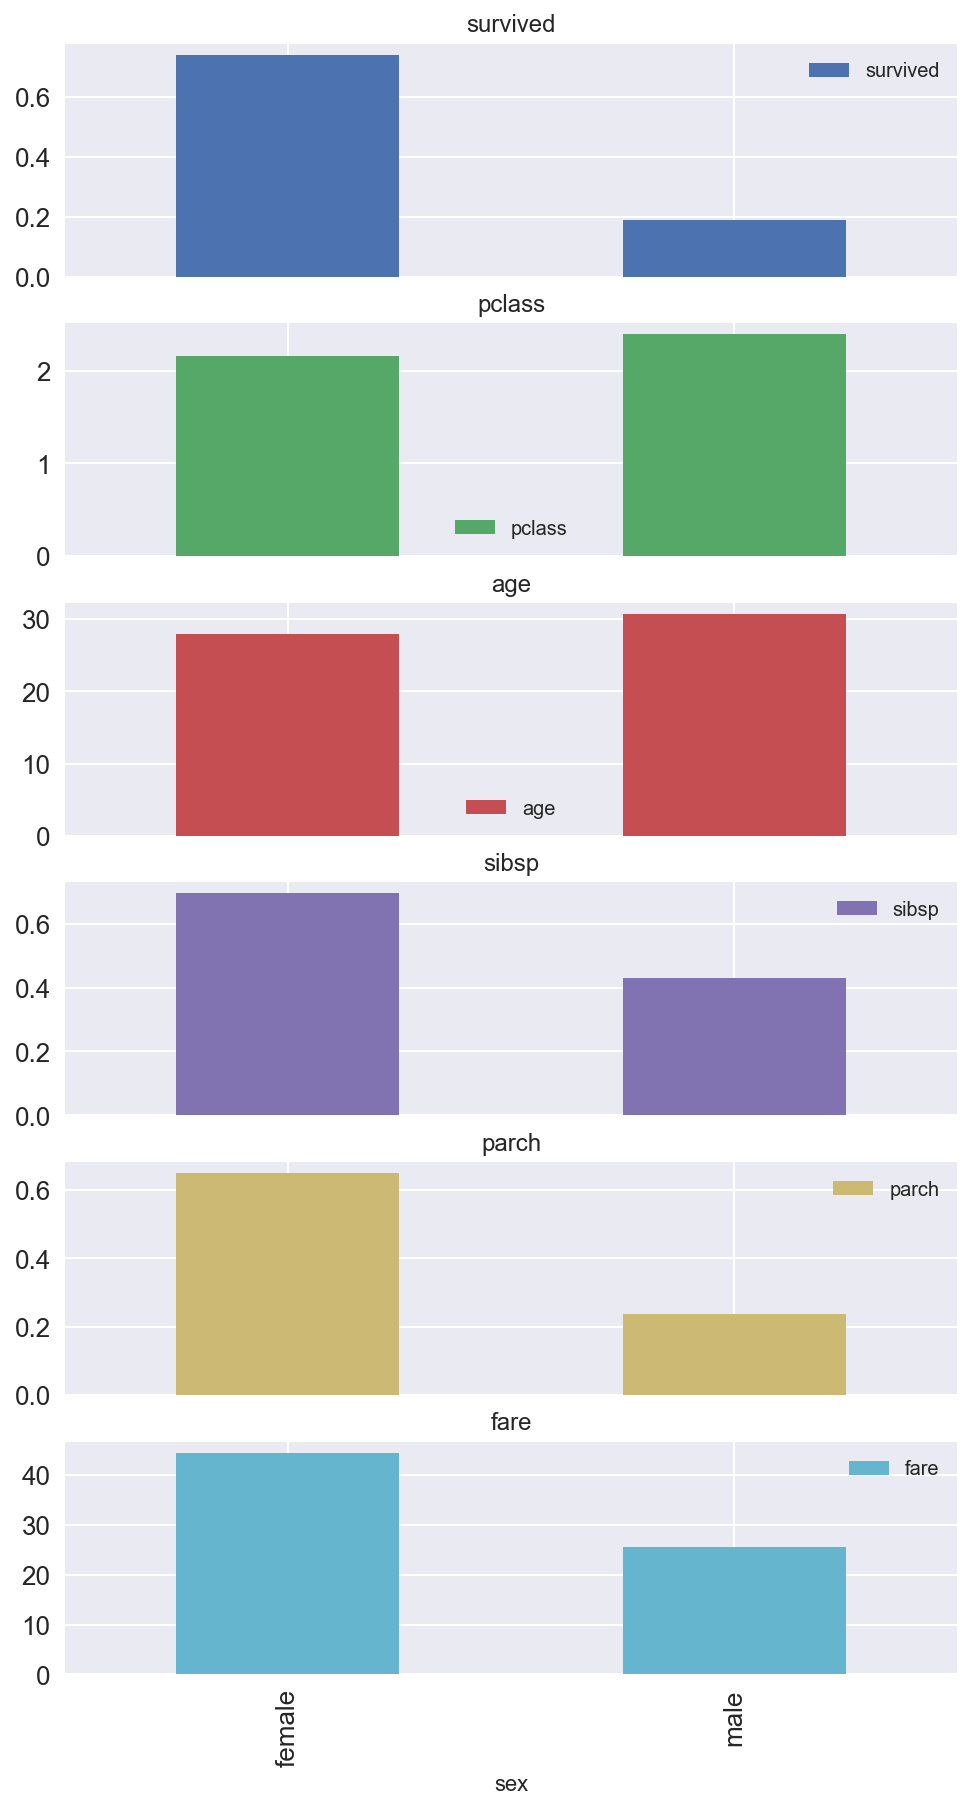

In [78]:
new_df.plot(kind = "bar", subplots = True, figsize = (8,15), fontsize= 13)
plt.show()

In [79]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [80]:
#summer.profile_report()

# More Examples of Split-Apply-Combine

In [81]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [82]:
medals_per_country = summer.groupby("Country").Medal.count()

In [83]:
medals_per_country

Country
AFG      2
AHO      1
ALG     15
ANZ     29
ARG    259
      ... 
VIE      2
YUG    435
ZAM      2
ZIM     23
ZZX     48
Name: Medal, Length: 147, dtype: int64

In [84]:
#First 20 Countries with the highest number of Medals
summer.groupby("Country").Medal.count().nlargest(n = 20)

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [85]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n = 20)

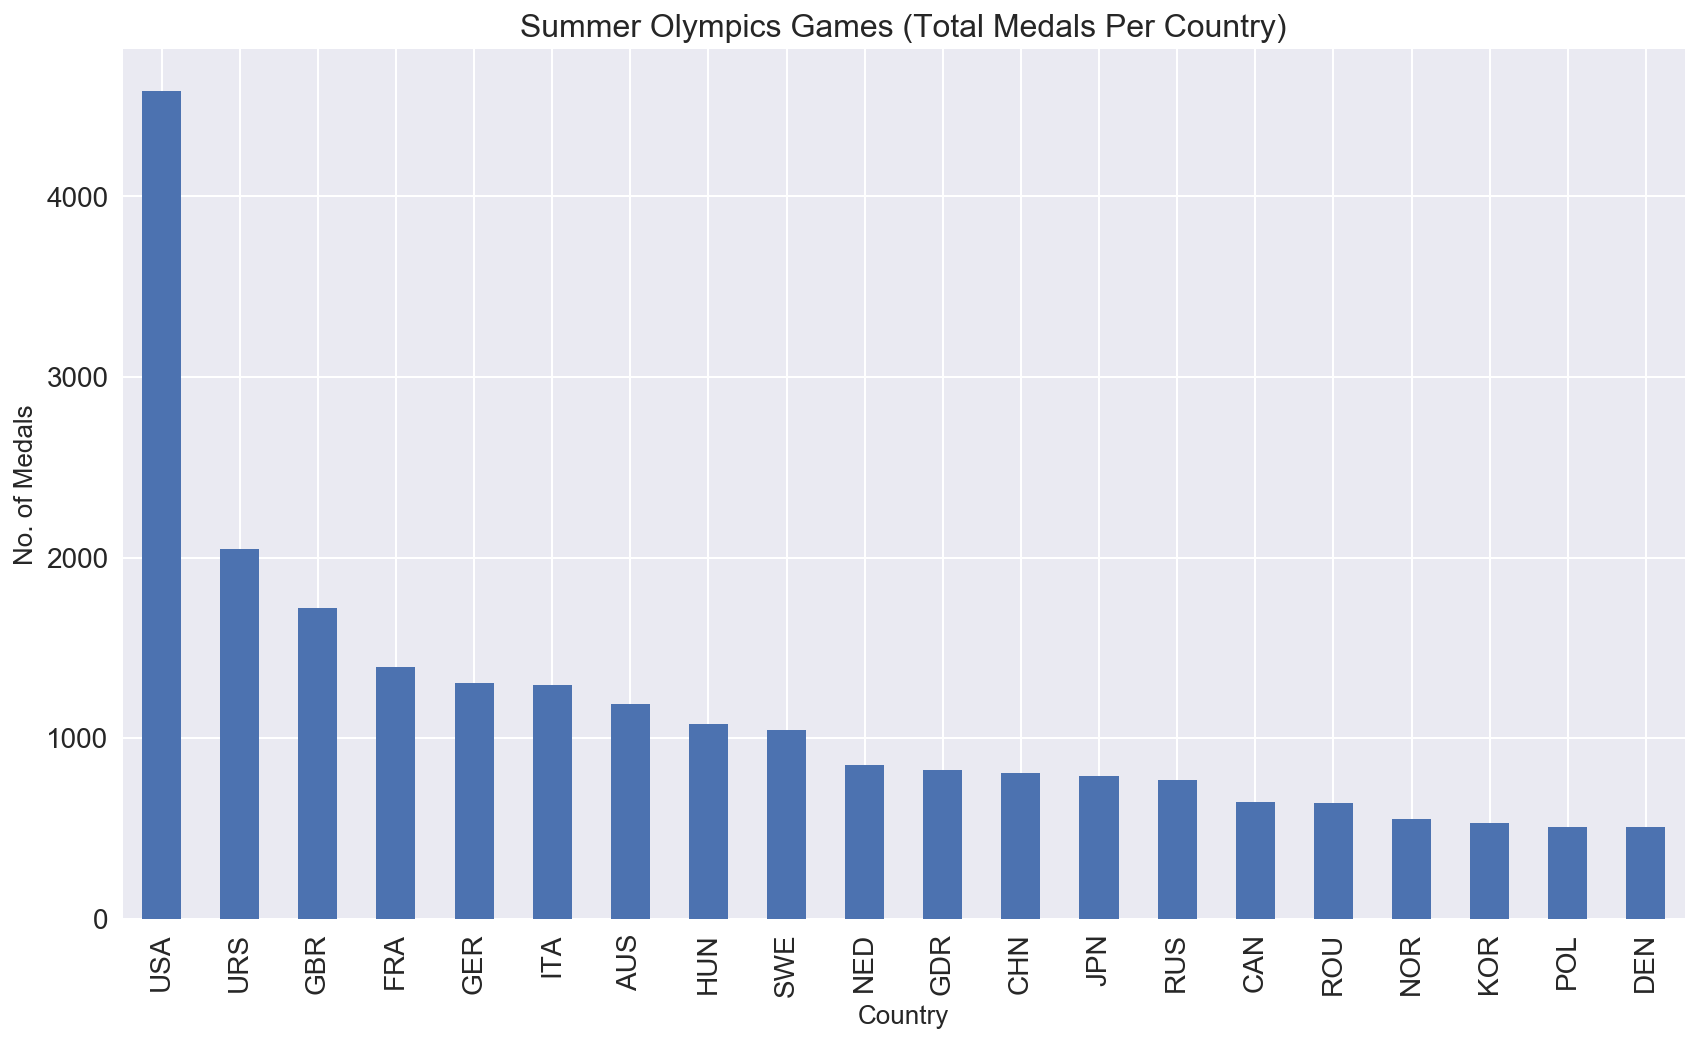

In [86]:
medals_per_country.plot(kind = "bar", subplots = True, figsize = (14,8), fontsize= 14)
plt.xlabel("Country", fontsize= 13)
plt.ylabel("No. of Medals", fontsize= 13)
plt.title("Summer Olympics Games (Total Medals Per Country)", fontsize=16)
plt.show()

In [87]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [88]:
titanic.groupby("pclass").fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [89]:
titanic.groupby("pclass").survived.mean()#Survival rate by passenger class

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [90]:
titanic.groupby("sex").survived.mean()#Survival rate by sex

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [91]:
titanic.survived.mean()#Average survival rate

0.3838383838383838

In [92]:
#Lets add another column adult_child
titanic["adult_child"] = "adult"

In [93]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,adult_child
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [94]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,adult_child
886,0,2,male,27.0,0,0,13.00,S,NaN,adult
887,1,1,female,19.0,0,0,30.00,S,B,adult
888,0,3,female,NaN,1,2,23.45,S,NaN,adult
889,1,1,male,26.0,0,0,30.00,C,C,adult
890,0,3,male,32.0,0,0,7.75,Q,NaN,adult


In [95]:
#Lets now override the adult value with child values for age less than 18
titanic.loc[titanic.age < 18, "adult_child"] = "child"

In [96]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,adult_child
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,child
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,child


In [97]:
titanic.tail(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,adult_child
871,1,1,female,47.0,1,1,52.5542,S,D,adult
872,0,1,male,33.0,0,0,5.0000,S,B,adult
873,0,3,male,47.0,0,0,9.0000,S,NaN,adult
874,1,2,female,28.0,1,0,24.0000,C,NaN,adult
875,1,3,female,15.0,0,0,7.2250,C,NaN,child
876,0,3,male,20.0,0,0,9.8458,S,NaN,adult
877,0,3,male,19.0,0,0,7.8958,S,NaN,adult
878,0,3,male,NaN,0,0,7.8958,S,NaN,adult
879,1,1,female,56.0,0,1,83.1583,C,C,adult
880,1,2,female,25.0,0,1,26.0000,S,NaN,adult


In [98]:
titanic.adult_child.value_counts() #Count the values in adult_child column

adult    778
child    113
Name: adult_child, dtype: int64

In [99]:
#Now lets calculate the survival rate for adult and children
titanic.groupby("adult_child").survived.mean()

adult_child
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [100]:
#Lets count the number that survived in each group by sex and whether adult_child
titanic.groupby(["sex", "adult_child"]).survived.count()

sex     adult_child
female  adult          259
        child           55
male    adult          519
        child           58
Name: survived, dtype: int64

In [101]:
#Lets now check the average survival rate in each group
titanic.groupby(["sex", "adult_child"]).survived.mean().sort_values(ascending=False)

sex     adult_child
female  adult          0.752896
        child          0.690909
male    child          0.396552
        adult          0.165703
Name: survived, dtype: float64

In [102]:
avg_survival_rate = titanic.groupby(["sex", "adult_child"]).survived.mean().sort_values(ascending=False)

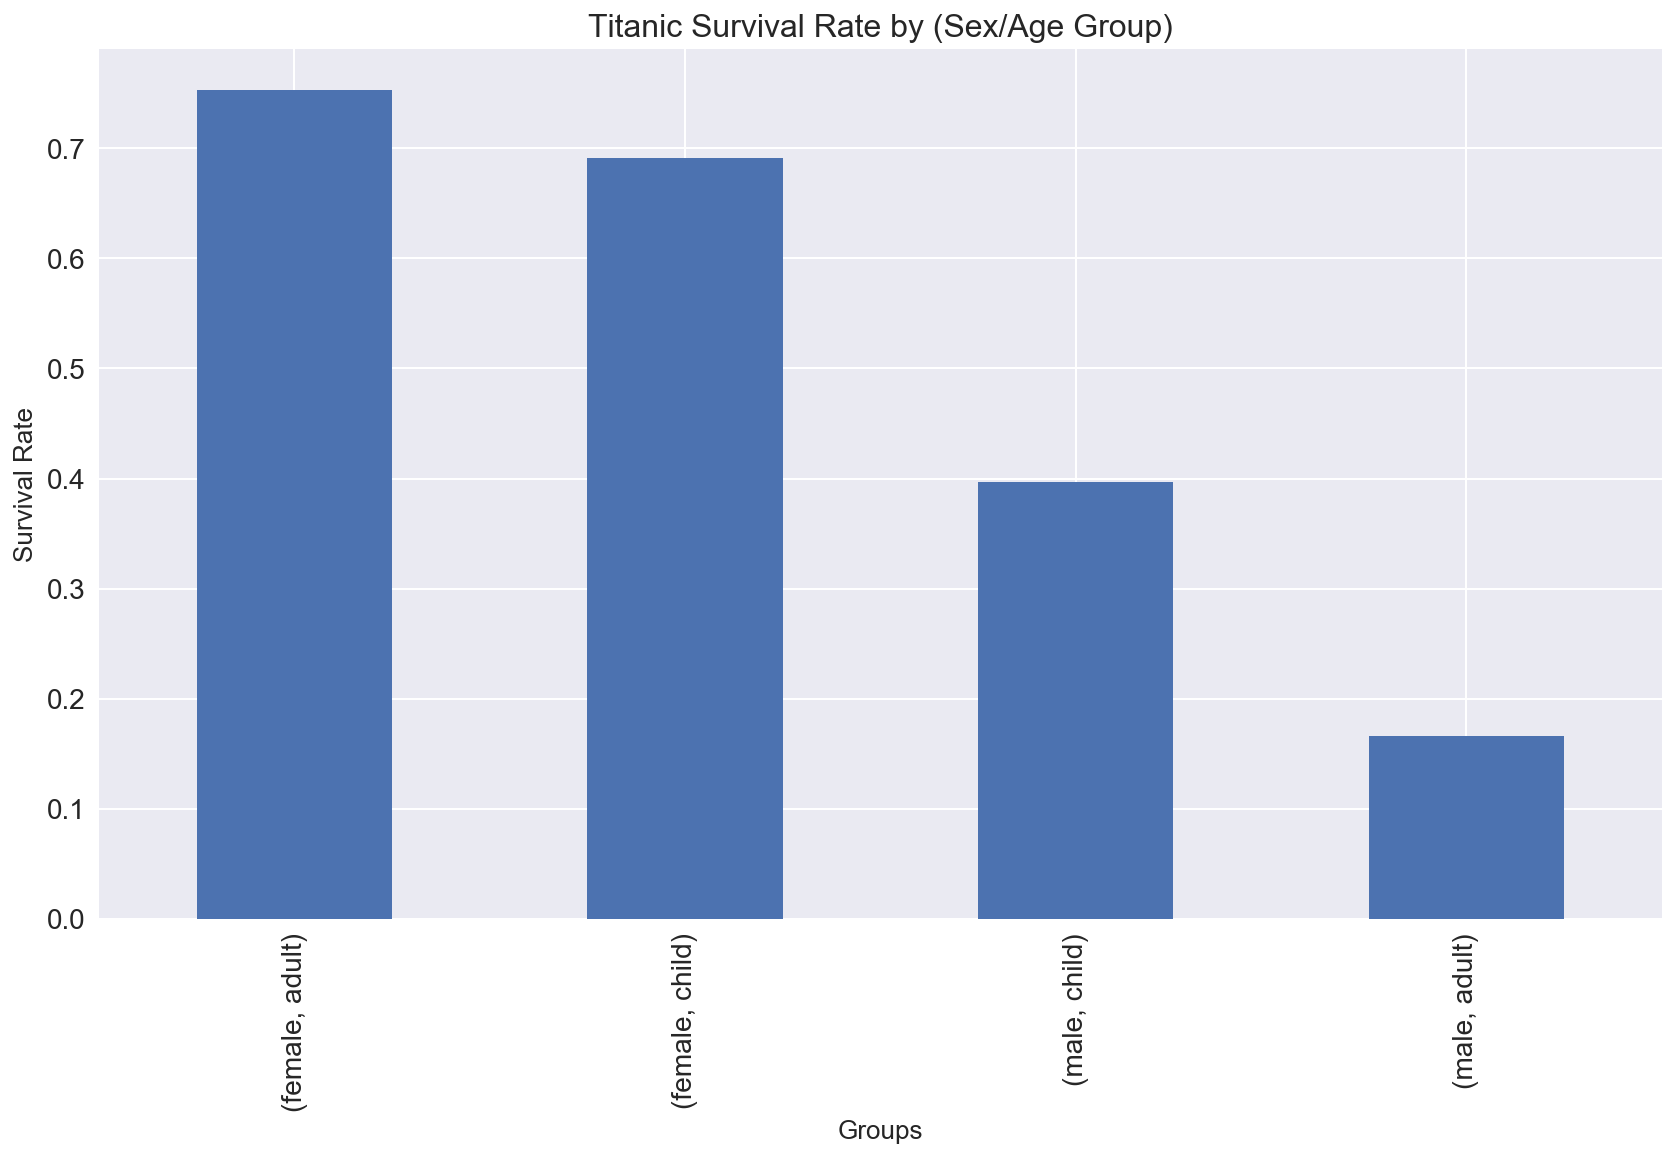

In [103]:
avg_survival_rate.plot(kind = "bar", figsize = (14,8), fontsize= 14)
plt.xlabel("Groups", fontsize= 13)
plt.ylabel("Survival Rate", fontsize= 13)
plt.title("Titanic Survival Rate by (Sex/Age Group)", fontsize=16)
plt.show()

# Generalizing Split-Apply-Combine  with Apply()

In [104]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,adult_child
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [105]:
titanic.groupby("sex").mean()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [107]:
female_group = list(titanic.groupby("sex"))[0][1]

In [109]:
female_group.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,adult_child
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,child
10,1,3,female,4.0,1,1,16.7000,S,G,child
11,1,1,female,58.0,0,0,26.5500,S,C,adult
14,0,3,female,14.0,0,0,7.8542,S,NaN,child
15,1,2,female,55.0,0,0,16.0000,S,NaN,adult
18,0,3,female,31.0,1,0,18.0000,S,NaN,adult


In [110]:
female_group.mean()

survived     0.742038
pclass       2.159236
age         27.915709
sibsp        0.694268
parch        0.649682
fare        44.479818
dtype: float64

In [111]:
#Alternative method
def group_mean(group):
    return group.mean()

In [112]:
group_mean(female_group)

survived     0.742038
pclass       2.159236
age         27.915709
sibsp        0.694268
parch        0.649682
fare        44.479818
dtype: float64

In [113]:
titanic.groupby("sex").apply(group_mean)

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [114]:
titanic.nlargest(5, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,adult_child
630,1,1,male,80.0,0,0,30.0000,S,A,adult
851,0,3,male,74.0,0,0,7.7750,S,NaN,adult
96,0,1,male,71.0,0,0,34.6542,C,A,adult
493,0,1,male,71.0,0,0,49.5042,C,NaN,adult
116,0,3,male,70.5,0,0,7.7500,Q,NaN,adult


In [115]:
def five_oldest_survivers(group):
    return group[group.survived == 1].nlargest(5, "age")

In [116]:
titanic.groupby("sex").apply(five_oldest_survivers)

survived  pclass     sex   age  sibsp  parch     fare embarked  \
sex                                                                          
female 275         1       1  female  63.0      1      0  77.9583        S   
       483         1       3  female  63.0      0      0   9.5875        S   
       829         1       1  female  62.0      0      0  80.0000      NaN   
       366         1       1  female  60.0      1      0  75.2500        C   
       11          1       1  female  58.0      0      0  26.5500        S   
male   630         1       1    male  80.0      0      0  30.0000        S   
       570         1       2    male  62.0      0      0  10.5000        S   
       587         1       1    male  60.0      1      1  79.2000        C   
       647         1       1    male  56.0      0      0  35.5000        C   
       449         1       1    male  52.0      0      0  30.5000        S   

           deck adult_child  
sex                          
female 275    D       adult  
       483  NaN       adult  
       829    B       adult  
       366    D       adult  
       11     C       adult  
male   630    A       adult  
       570  NaN       adult  
       587    B       adult  
       647    A       adult  
       449    C       adult